<a href="https://colab.research.google.com/github/Vicrrs/Introducao_Pandas/blob/main/Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Criando os nomes


In [ ]:
import pandas as pd

In [ ]:
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=20&sexo=f")
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=20&sexo=m")

In [ ]:
nomes_f.sample(5)

,nome,regiao,freq,rank,sexo
17,LUCIANA,0,429769,18,F
18,VANESSA,0,417512,19,F
13,BRUNA,0,460770,14,F
19,MARIANA,0,381778,20,F
14,JESSICA,0,456472,15,F


In [ ]:
nomes_m.sample(5)

,nome,regiao,freq,rank,sexo
5,PAULO,0,1417907,6,M
1,JOAO,0,2971935,2,M
4,CARLOS,0,1483121,5,M
2,ANTONIO,0,2567494,3,M
0,JOSE,0,5732508,1,M


In [ ]:
print("Quantidade de pontos: " + str(len(nomes_f) + len(nomes_m)))

Quantidade de pontos: 40


In [ ]:
frames = [nomes_f, nomes_m]


In [ ]:
nomes = pd.concat(frames)['nome'].to_frame()

In [ ]:
nomes

,nome
0,MARIA
1,ANA
2,FRANCISCA
3,ANTONIA
4,ADRIANA
5,JULIANA
6,MARCIA
7,FERNANDA
8,PATRICIA
9,ALINE


# Incluindo ID dos alunos

In [ ]:
import numpy as np

In [ ]:
# gerando sempre a mesma sequencia de numeros aletorios
np.random.seed(123)

In [ ]:
total_alunos = len(nomes)
total_alunos

40

In [ ]:
nomes["id_alunos"] = np.random.permutation(total_alunos) +1 

In [ ]:
nomes.sample(5)

,nome,id_alunos
8,PATRICIA,14
15,BRUNO,20
0,JOSE,26
11,GABRIEL,37
8,LUIZ,10


In [ ]:
dominios = ['@dominioemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [ ]:
nomes

,nome,id_alunos,dominio
0,MARIA,7,@dominioemail.com.br
1,ANA,11,@servicodoemail.com
2,FRANCISCA,13,@servicodoemail.com
3,ANTONIA,39,@servicodoemail.com
4,ADRIANA,6,@dominioemail.com.br
5,JULIANA,12,@servicodoemail.com
6,MARCIA,24,@servicodoemail.com
7,FERNANDA,2,@dominioemail.com.br
8,PATRICIA,14,@dominioemail.com.br
9,ALINE,21,@servicodoemail.com


In [ ]:
nomes.sample(5)

,nome,id_alunos,dominio
14,MARCELO,23,@dominioemail.com.br
2,FRANCISCA,13,@servicodoemail.com
12,RAFAEL,33,@servicodoemail.com
9,ALINE,21,@servicodoemail.com
11,CAMILA,38,@dominioemail.com.br


In [ ]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [ ]:
nomes.sample(5)

,nome,id_alunos,dominio,email
4,ADRIANA,6,@dominioemail.com.br,adriana@dominioemail.com.br
0,MARIA,7,@dominioemail.com.br,maria@dominioemail.com.br
13,DANIEL,34,@dominioemail.com.br,daniel@dominioemail.com.br
15,LETICIA,40,@servicodoemail.com,leticia@servicodoemail.com
11,CAMILA,38,@dominioemail.com.br,camila@dominioemail.com.br


# Criando a tabela Cursos


In [ ]:
!pip3 install html5lib
!pip3 install lxml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import html5lib

In [ ]:
url = 'https://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [ ]:
type(cursos)

list

In [ ]:
cursos = cursos[0]

In [ ]:
 cursos

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [ ]:
type(cursos)

pandas.core.frame.DataFrame

In [ ]:
cursos.head(5)

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# Alterando o index dos cursos

In [ ]:
cursos = cursos.rename(columns={'Nome do curso': 'nome_do_curso'})

In [ ]:
cursos.head(2)

,nome_do_curso
0,Lógica de programação
1,Java para Web


In [ ]:
cursos['id'] = cursos.index + 1

In [ ]:
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [ ]:
curso = cursos.set_index('id')

In [ ]:
curso.head(10)

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


# Matriculando os alunos nos cursos

In [ ]:
nomes.sample(5)

,nome,id_alunos,dominio,email
7,FERNANDA,2,@dominioemail.com.br,fernanda@dominioemail.com.br
12,RAFAEL,33,@servicodoemail.com,rafael@servicodoemail.com
11,GABRIEL,37,@servicodoemail.com,gabriel@servicodoemail.com
17,LUCIANA,32,@servicodoemail.com,luciana@servicodoemail.com
13,BRUNA,8,@servicodoemail.com,bruna@servicodoemail.com


In [ ]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)

In [ ]:
nomes.sample(5)

,nome,id_alunos,dominio,email,matriculas
6,PEDRO,15,@dominioemail.com.br,pedro@dominioemail.com.br,1
16,JULIA,4,@servicodoemail.com,julia@servicodoemail.com,1
8,PATRICIA,14,@dominioemail.com.br,patricia@dominioemail.com.br,1
2,FRANCISCA,13,@servicodoemail.com,francisca@servicodoemail.com,2
4,ADRIANA,6,@dominioemail.com.br,adriana@dominioemail.com.br,1


In [ ]:
nomes.matriculas.describe()

count    40.000000
mean      1.700000
std       0.966092
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       4.000000
Name: matriculas, dtype: float64

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


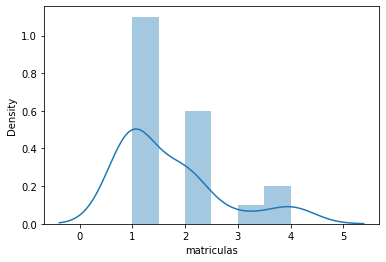

In [ ]:
sns.distplot(nomes.matriculas)

In [ ]:
nomes.matriculas.value_counts()

1    22
2    12
4     4
3     2
Name: matriculas, dtype: int64

In [ ]:
nomes.sample(5)

,nome,id_alunos,dominio,email,matriculas
11,CAMILA,38,@dominioemail.com.br,camila@dominioemail.com.br,1
6,PEDRO,15,@dominioemail.com.br,pedro@dominioemail.com.br,1
10,SANDRA,9,@servicodoemail.com,sandra@servicodoemail.com,2
11,GABRIEL,37,@servicodoemail.com,gabriel@servicodoemail.com,3
3,FRANCISCO,36,@servicodoemail.com,francisco@servicodoemail.com,2


# Selecionando cursos

In [ ]:
nomes.sample(3)

,nome,id_alunos,dominio,email,matriculas
2,FRANCISCA,13,@servicodoemail.com,francisca@servicodoemail.com,2
16,EDUARDO,18,@servicodoemail.com,eduardo@servicodoemail.com,1
11,CAMILA,38,@dominioemail.com.br,camila@dominioemail.com.br,1


In [ ]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [ ]:
for index, row in nomes.iterrows():
  id = row.id_alunos
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])

In [ ]:
matriculas.head()

,id_aluno,id_curso
0,7,3
1,11,15
2,13,5
3,13,10
4,39,2


In [ ]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno' : 'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
0,1,Lógica de programação
1,2,Java para Web
2,6,C# para Web
3,1,Ruby on Rails
4,1,Cursos de Python
5,4,PHP com MySql
6,7,.NET para web
7,5,Novas integrações com Java
9,10,Código limpo com C#


In [ ]:
nomes.sample(3)

,nome,id_alunos,dominio,email,matriculas
14,MARCELO,23,@dominioemail.com.br,marcelo@dominioemail.com.br,2
3,FRANCISCO,36,@servicodoemail.com,francisco@servicodoemail.com,2
1,ANA,11,@servicodoemail.com,ana@servicodoemail.com,1


In [ ]:
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [ ]:
matriculas.head()

,id_aluno,id_curso
0,7,3
1,11,15
2,13,5
3,13,10
4,39,2


In [ ]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno' : 'quantidade_de_alunos'})

In [ ]:
matriculas_por_curso

,quantidade_de_alunos,nome_do_curso
id_curso,,
0,1,Lógica de programação
1,2,Java para Web
2,6,C# para Web
3,1,Ruby on Rails
4,1,Cursos de Python
5,4,PHP com MySql
6,7,.NET para web
7,5,Novas integrações com Java
9,10,Código limpo com C#


# Saída em diferentes formatos






In [ ]:
matriculas_por_curso.head(3)

,quantidade_de_alunos,nome_do_curso
id_curso,,
0,1,Lógica de programação
1,2,Java para Web
2,6,C# para Web


In [ ]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index = False)

In [ ]:
pd.read_csv('matriculas_por_curso.csv')

,quantidade_de_alunos,nome_do_curso
0,1,Lógica de programação
1,2,Java para Web
2,6,C# para Web
3,1,Ruby on Rails
4,1,Cursos de Python
5,4,PHP com MySql
6,7,.NET para web
7,5,Novas integrações com Java
8,10,Código limpo com C#
9,7,Preparatório para certificação Java


In [ ]:
matriculas_json = matriculas_por_curso.to_json()
matriculas_json

'{"quantidade_de_alunos":{"0":1,"1":2,"2":6,"3":1,"4":1,"5":4,"6":7,"7":5,"9":10,"10":7,"12":5,"13":7,"14":1,"15":3,"17":6,"18":2},"nome_do_curso":{"0":"L\\u00f3gica de programa\\u00e7\\u00e3o","1":"Java para Web","2":"C# para Web","3":"Ruby on Rails","4":"Cursos de Python","5":"PHP com MySql","6":".NET para web","7":"Novas integra\\u00e7\\u00f5es com Java","9":"C\\u00f3digo limpo com C#","10":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Persist\\u00eancia com .NET","13":"Desenvolvendo jogos","14":"An\\u00e1lise de dados","15":"Estat\\u00edstica b\\u00e1sica","17":"Programa\\u00e7\\u00e3o funcional","18":"Boas pr\\u00e1ticas em Java"}}'

In [ ]:
matriculas_html = matriculas_por_curso.to_html()
matriculas_html

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>quantidade_de_alunos</th>\n      <th>nome_do_curso</th>\n    </tr>\n    <tr>\n      <th>id_curso</th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>1</td>\n      <td>Lógica de programação</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>2</td>\n      <td>Java para Web</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>6</td>\n      <td>C# para Web</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>1</td>\n      <td>Ruby on Rails</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>1</td>\n      <td>Cursos de Python</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>4</td>\n      <td>PHP com MySql</td>\n    </tr>\n    <tr>\n      <th>6</th>\n      <td>7</td>\n      <td>.NET para web</td>\n    </tr>\n    <tr>\n      <th>7</th>\n      <td>5</td>\n      <td>Novas integrações com Java</td>\n    </tr

# Criando o Banco SQL

In [ ]:
!pip install sqlalchemy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sqlalchemy import create_engine, MetaData, Table

In [ ]:
engine = create_engine('sqlite:///:memory:')

In [ ]:
type(engine)

sqlalchemy.engine.base.Engine

In [ ]:
matriculas_por_curso.head(3)

,quantidade_de_alunos,nome_do_curso
id_curso,,
0,1,Lógica de programação
1,2,Java para Web
2,6,C# para Web


In [ ]:
matriculas_por_curso.head(3).to_sql('matriculas', engine)

In [ ]:
print(engine.table_names())

['matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


#Buscando do banco sql

In [ ]:
query = 'select * from matriculas where quantidade_de_alunos <20'

In [ ]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,0,1,Lógica de programação
1,1,2,Java para Web
2,2,6,C# para Web


In [ ]:
pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,6


In [ ]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

In [ ]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 2')

In [ ]:
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
2,C# para Web,6


#Escrevendo no Banco

In [ ]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

In [ ]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


# Nomes dos alunos e alunas da próxima turma

In [ ]:
matriculas_por_curso.head(20)

,quantidade_de_alunos,nome_do_curso
id_curso,,
0,1,Lógica de programação
1,2,Java para Web
2,6,C# para Web
3,1,Ruby on Rails
4,1,Cursos de Python
5,4,PHP com MySql
6,7,.NET para web
7,5,Novas integrações com Java
9,10,Código limpo com C#


In [ ]:
matriculas

,id_aluno,id_curso
0,7,3
1,11,15
2,13,5
3,13,10
4,39,2
...,...,...
63,29,12
64,29,13
65,3,10
66,3,9


In [ ]:
id_curso = 15
proxima_turma = matriculas.query("id_curso == {}".format(id_curso))

In [ ]:
proxima_turma

,id_aluno,id_curso
1,11,15
36,36,15
55,33,15


In [ ]:
nomes.sample(3)

,nome,id_alunos,dominio,email,matriculas
2,FRANCISCA,13,@servicodoemail.com,francisca@servicodoemail.com,2
18,VANESSA,22,@servicodoemail.com,vanessa@servicodoemail.com,1
15,LETICIA,40,@servicodoemail.com,leticia@servicodoemail.com,1


In [ ]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

In [ ]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

In [ ]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [ ]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Estatística básica
id                               16
Name: 15, dtype: object

In [ ]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Estatística básica'

In [ ]:
proxima_turma.rename(columns = {'nome':'Alunos do curso de {}'.format(nome_curso)})

,id_aluno,id_curso
1,11,15
36,36,15
55,33,15


In [ ]:
proxima_turma = proxima_turma.rename(columns = {'nome':'Alunos do curso de {}'.format(nome_curso)})

#Excel

In [ ]:
proxima_turma.to_excel('proxima_turma.xlsx', index = False)

In [ ]:
pd.read_excel('proxima_turma.xlsx')

,id_aluno,id_curso
0,11,15
1,36,15
2,33,15
